# Segmentação de Hábitos Alimentares e Previsão Socioeconômica em Famílias do Uíge.
## Usando K-Means++
------------------------------------------------------------------

# Fundamentação do problema
Com o problema em questão foi necessário  a colheta de informações de alguns bairros do Uíge, nomeadamente:
- Papelão;
- Kakiuia;
- Mbemba Ngango;
- Benvindo.

Para a obtenção das informações, realizou - se entrevista na qual foi possível a extração das características ou atributos que são relevantes para a solução do problema:

- Residente_Bairro                      
- Quantos membros compoem a sua Familia     
- Qual a faixa de renda mensal da sua familia
- Num_refeições                                
- Estimativa_Orçamento_Alimentar_diario       
- Padrão alimentar               
- fatores da escolhas alimentares               
- influencia da situacao economica


As características listadas por serem relevantes foram escolhidos com intuito de fornecer uma visão geral em questão dos habitos alimentares e previsões socioeconômico em famílias do Uíge.

Ex: "Num_refeições" com esta característica foi possível conhecer as variações de refeições que as famílias têm em relação as outras.

Em suma, para segmentar o problema foi de grande importância as características colhetas permitindo nas diferentes estratégias socioeconômicas e de como podemos resolver os habitos alimentares em famílias do Uíge.

**1. Carregamento e Preparação dos Dados:**

- Transformamos os dados categóricos em numéricos;

In [2]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
import seaborn as sns

**2. Carregamento do Dataset**

O dataset foi posta no formato csv, e código abaixo permite ler o mesmo.

In [3]:
data=pd.read_csv('AlimentHabit.csv',sep=";")
data.head()

,Residente_Bairro,Quantos membros compoem a sua Familia,Qual a faixa de renda mensal da sua familia,Num_refeições,Estimativa_Orçamento_Alimentar_diario,Padrão alimentar,fatores da escolhas alimentares,influencia da situacao economica
0,1,5,0,2,1500,2,2,0
1,0,4,0,3,1000,3,1,1
2,2,8,15000,2,2500,2,0,1
3,0,7,163000,4,7000,1,2,0
4,1,9,50000,3,1500,2,0,1


In [4]:
# Renomeando as colunas
data.rename(columns={
    'Residente_Bairro': 'Bairro',
    'Quantos membros compoem a sua Familia':'Membros',
    'Qual a faixa de renda mensal da sua familia':'Renda Mensal',
    'Num_refeições':'Refeições',
    'Estimativa_Orçamento_Alimentar_diario': 'Orçamento alimentar',
    'Padrão alimentar':'Padrão alimentar',
    'fatores da escolhas alimentares':'Factores',
    'influencia da situacao economica':'Situação economica'

}, inplace=True)

# Imprimir o atual DataFrame
data.head()

,Bairro,Membros,Renda Mensal,Refeições,Orçamento alimentar,Padrão alimentar,Factores,Situação economica
0,1,5,0,2,1500,2,2,0
1,0,4,0,3,1000,3,1,1
2,2,8,15000,2,2500,2,0,1
3,0,7,163000,4,7000,1,2,0
4,1,9,50000,3,1500,2,0,1


In [5]:
data.shape
dset = pd.DataFrame(data)

**3. Verificação de dados Nulos**

In [6]:
data.isnull().sum()

Bairro                 0
Membros                0
Renda Mensal           0
Refeições              0
Orçamento alimentar    0
Padrão alimentar       0
Factores               0
Situação economica     0
dtype: int64

**4. Padronização dos Dados:**

- Padronizamos os dados usando o StandardScaler para garantir que cada variável tenha a mesma escala.

In [7]:
scaler = StandardScaler()
scaler.fit(data)
scaled_data = scaler.transform(data)

**3. Determinação do Número de Clusters:**

- Utilizamos o método do Elbow para determinar o número ideal de clusters.
- Calculamos a soma dos quadrados intra-cluster (WCSS) para diferentes valores de k (número de clusters).
- Plotarmos o gráfico de Elbow para visualizar o ponto de cotovelo, que indica o número ideal de clusters.

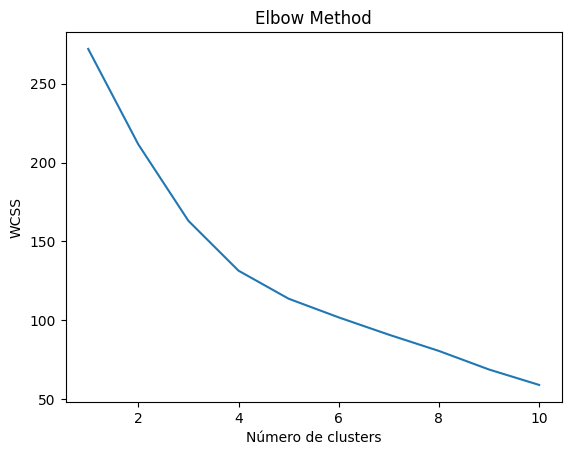

In [8]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

**4. Aplicação do K-Means:**
### Após a avaliação do gráfico, vimos que A "curva do cotovelo" no gráfico está no número 3 de clusters, indicando que o número ideal de clusters é 3.

In [9]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)
# Get cluster labels
labels = kmeans.labels_
# Add cluster labels to the DataFrame
data['cluster'] = labels
# Print the DataFrame with cluster labels
data.head()

,Bairro,Membros,Renda Mensal,Refeições,Orçamento alimentar,Padrão alimentar,Factores,Situação economica,cluster
0,1,5,0,2,1500,2,2,0,2
1,0,4,0,3,1000,3,1,1,0
2,2,8,15000,2,2500,2,0,1,0
3,0,7,163000,4,7000,1,2,0,1
4,1,9,50000,3,1500,2,0,1,0


In [10]:
# Fazer previsões
y_pred = kmeans.predict(scaled_data)
print(y_pred)

[2 0 0 1 0 2 0 2 1 2 1 2 0 0 2 0 2 2 2 2 2 2 0 0 2 2 0 0 0 0 0 0 2 1]


**5. Análise dos Clusters:**

- Calculamos a média, a mediana e a descrição estatística dos dados para cada cluster.
- Interpretamos os resultados para entender as características de cada cluster.

In [11]:
grouped_data = data.groupby('cluster')

In [12]:
grouped_data.mean()

,Bairro,Membros,Renda Mensal,Refeições,Orçamento alimentar,Padrão alimentar,Factores,Situação economica
cluster,,,,,,,,
0,1.466667,5.800000,31566.666667,2.800000,3235.800000,2.733333,0.266667,0.933333
1,1.000000,6.750000,193375.000000,2.750000,6437.750000,1.000000,1.250000,0.500000
2,0.600000,5.533333,7546.666667,1.933333,2585.333333,2.266667,1.466667,0.733333


In [13]:
grouped_data.median()

,Bairro,Membros,Renda Mensal,Refeições,Orçamento alimentar,Padrão alimentar,Factores,Situação economica
cluster,,,,,,,,
0,1.0,5.0,18700.0,3.0,2500.0,3.0,0.0,1.0
1,0.5,6.5,181500.0,2.5,6750.0,1.0,1.0,0.5
2,0.0,5.0,0.0,2.0,2300.0,2.0,1.0,1.0


In [14]:
grouped_data.describe()

Bairro                                              Membros            \
         count      mean       std  min  25%  50%  75%  max   count      mean   
cluster                                                                         
0         15.0  1.466667  0.990430  0.0  1.0  1.0  2.0  3.0    15.0  5.800000   
1          4.0  1.000000  1.414214  0.0  0.0  0.5  1.5  3.0     4.0  6.750000   
2         15.0  0.600000  0.910259  0.0  0.0  0.0  1.0  3.0    15.0  5.533333   

         ... Factores      Situação economica                                \
         ...      75%  max              count      mean       std  min  25%   
cluster  ...                                                                  
0        ...     0.50  1.0               15.0  0.933333  0.258199  0.0  1.0   
1        ...     1.25  2.0                4.0  0.500000  0.577350  0.0  0.0   
2        ...     2.00  2.0               15.0  0.733333  0.457738  0.0  0.5   

                        
         50%  75%  max  
cluster                 
0        1.0  1.0  1.0  
1        0.5  1.0  1.0  
2        1.0  1.0  1.0  

[3 rows x 64 columns]

# Análise dos resultados

In [15]:
# Conclusões
print("\n**Resultados:**")

print("1. Bairro:")
print("Cluster 0 (Kakiuia): Apresenta um número significativo de membros, média de 1.46 para o número de membros e grande variabilidade(desvio padrão 0.99).")
print("Cluster 1 (Mbemba): Menor número de membros, média de 1.0 e variabilidade de 1.41.")
print("Cluster 2 (Papelão): Similar ao Cluster 0 em relação ao número de membros, mas com média de 0.6 e menor variabilidade (0.91).")

print("\n2. Padrão alimentar:")
print("A descrição não fornece informações sobre a distribuição do padrão alimentar dentro de cada cluster. Para analisar essa variável,")
print("seria necessário adicionar as informações de 'Europeu', 'Nacional', 'Misto' para cada cluster.")

print("\n3. Preparar ou comprar alimento:")
print("A descrição não fornece informações sobre a distribuição do método de preparação dos alimentos (preparar ou comprar) dentro de cada cluster.") 
print("Para analisar essa variável, seria necessário adicionar as informações de 'Preparar' e 'Comprar' para cada cluster.")

print("\n4. Fatores de escolha alimentar:")
print("A descrição não fornece informações sobre a distribuição dos fatores de escolha alimentar dentro de cada cluster. Para analisar essa variável,")
print("seria necessário adicionar as informações de 'Costume', 'Preço Baixo', 'Disponibilidade' e 'Situação Econômica' para cada cluster.")

print("\n5. Situação Econômica:")
print("Cluster 0 (Kakiuia): Apresenta média de 0.93 para a influência da situação econômica na escolha alimentar, com desvio padrão de 0.26.")
print("Cluster 1 (Mbemba): Média de 0.5 para a influência da situação econômica, com desvio padrão de 0.58.")
print("Cluster 2 (Papelão): Média de 0.73 para a influência da situação econômica, com desvio padrão de 0.46.")


**Resultados:**
1. Bairro:
Cluster 0 (Kakiuia): Apresenta um número significativo de membros, média de 1.46 para o número de membros e grande variabilidade(desvio padrão 0.99).
Cluster 1 (Mbemba): Menor número de membros, média de 1.0 e variabilidade de 1.41.
Cluster 2 (Papelão): Similar ao Cluster 0 em relação ao número de membros, mas com média de 0.6 e menor variabilidade (0.91).

2. Padrão alimentar:
A descrição não fornece informações sobre a distribuição do padrão alimentar dentro de cada cluster. Para analisar essa variável,
seria necessário adicionar as informações de 'Europeu', 'Nacional', 'Misto' para cada cluster.

3. Preparar ou comprar alimento:
A descrição não fornece informações sobre a distribuição do método de preparação dos alimentos (preparar ou comprar) dentro de cada cluster.
Para analisar essa variável, seria necessário adicionar as informações de 'Preparar' e 'Comprar' para cada cluster.

4. Fatores de escolha alimentar:
A descrição não fornece informações sobre

In [16]:

print("Conclusões:")

print("Apôs a Clusterização obtivemos a formação de 4 grupos onde tivemos os resultados acima. abaixo temos as conclusões sobre os resultados obtidos:")

print("Pontos em comum:") 
print("Todos os grupos têm um número médio semelhante de refeições por dia, variando de 1,9 a 3.") 
print("Os fatores que influenciam a escolha dos alimentos são semelhantes em todos os grupos, sendo o preço um fator significativo nos grupos 0, 2 e 3.") 
print("O número médio de membros da família é relativamente alto em todos os grupos, variando de 3,8 a 8,4.")

print("Diferenças:") 
print("Situação econômica: Os clusters 0 e 2 têm uma situação econômica mais baixa, enquanto os clusters 1 e 3 têm uma situação econômica mais alta.") 
print("Renda: O cluster 1 tem a maior renda média mensal, enquanto o cluster 2 tem a menor.") 
print("Padrão alimentar: O cluster 1 tem um padrão alimentar europeu mais tradicional, enquanto os clusters 0 e 2 têm um padrão alimentar mais misto ou nacional. O cluster 3 tem um padrão alimentar semelhante aos clusters 0 e 2.") 
print("Alocação orçamentária: O cluster 2 aloca a maior porcentagem de sua renda para alimentação (35%), enquanto o cluster 1 aloca a menor porcentagem (4%).")

print("Insights final:") 
print("Influência econômica: A situação econômica tem um impacto significativo nas escolhas alimentares, com grupos de baixa renda (0 e 2) priorizando preço e acessibilidade.") 
print("Evolução do padrão alimentar: Os clusters 0 e 2 podem mudar para um padrão alimentar mais misto ou saudável à medida que sua situação econômica melhora.") 
print("Ajustes orçamentários: O Cluster 2 pode precisar ajustar sua alocação orçamentária para acomodar o aumento dos preços dos alimentos ou mudanças nas necessidades da família.") 
print("Frequência das refeições: Os clusters 0 e 2 podem aumentar a frequência das refeições à medida que sua situação econômica melhora, enquanto o cluster 1 pode manter sua frequência atual de refeições.") 
print("Fatores de escolha alimentar: Caso a situação econômica melhore, fatores como saúde e nutrição podem se tornar mais influentes nas escolhas alimentares, especialmente nos grupos 0 e 2.")

Conclusões:
Apôs a Clusterização obtivemos a formação de 4 grupos onde tivemos os resultados acima. abaixo temos as conclusões sobre os resultados obtidos:
Pontos em comum:
Todos os grupos têm um número médio semelhante de refeições por dia, variando de 1,9 a 3.
Os fatores que influenciam a escolha dos alimentos são semelhantes em todos os grupos, sendo o preço um fator significativo nos grupos 0, 2 e 3.
O número médio de membros da família é relativamente alto em todos os grupos, variando de 3,8 a 8,4.
Diferenças:
Situação econômica: Os clusters 0 e 2 têm uma situação econômica mais baixa, enquanto os clusters 1 e 3 têm uma situação econômica mais alta.
Renda: O cluster 1 tem a maior renda média mensal, enquanto o cluster 2 tem a menor.
Padrão alimentar: O cluster 1 tem um padrão alimentar europeu mais tradicional, enquanto os clusters 0 e 2 têm um padrão alimentar mais misto ou nacional. O cluster 3 tem um padrão alimentar semelhante aos clusters 0 e 2.
Alocação orçamentária: O clust

## Gráfico de Boxplot: Para visualizar a distribuição dos atributos numéricos, podemos utilizar um gráfico de boxplot para cada atributo em cada cluster. Isso permitirá comparar a dispersão, a média e os outliers entre os clusters.

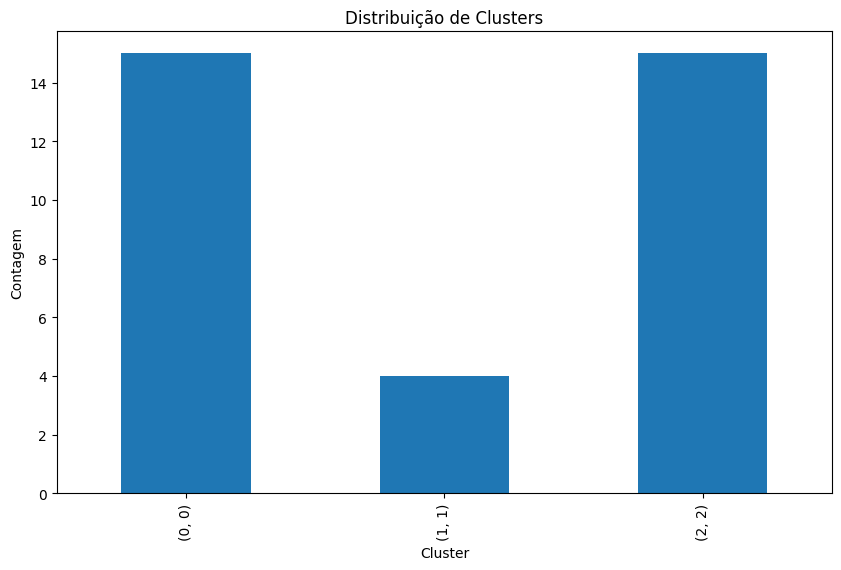

In [24]:

# Assuming 'grouped_data' is your DataFrame
# Replace 'grouped_data' with your actual DataFrame name
# Create a bar plot for the count of each cluster
plt.figure(figsize=(10, 6))
grouped_data['cluster'].value_counts().plot(kind='bar')
plt.title('Distribuição de Clusters')
plt.xlabel('Cluster')
plt.ylabel('Contagem')
plt.show()

grouped_data = data.groupby('cluster')



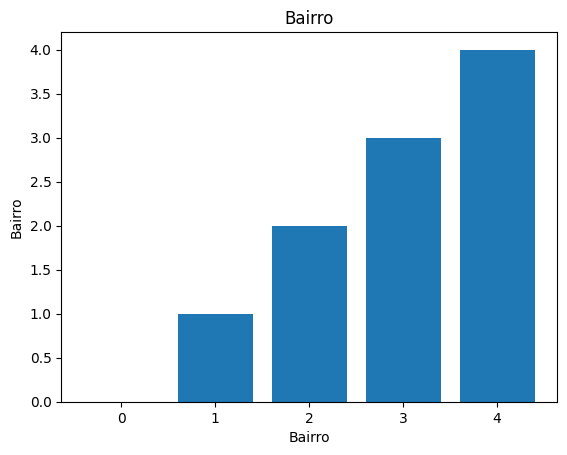

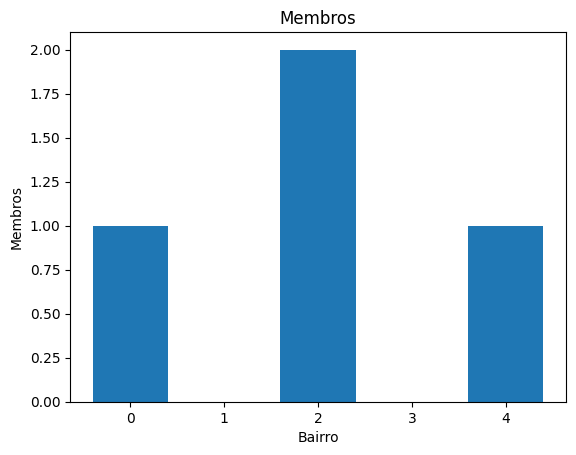

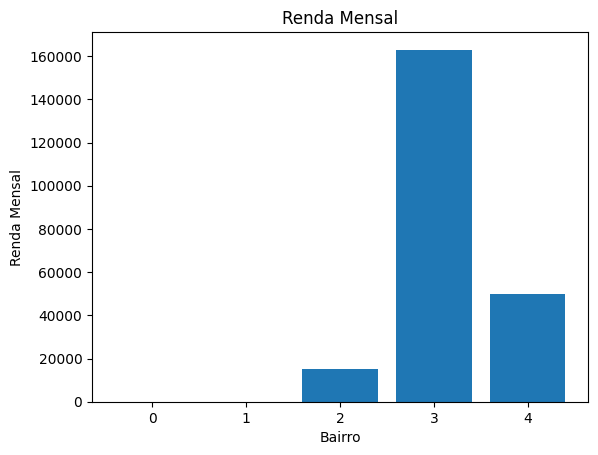

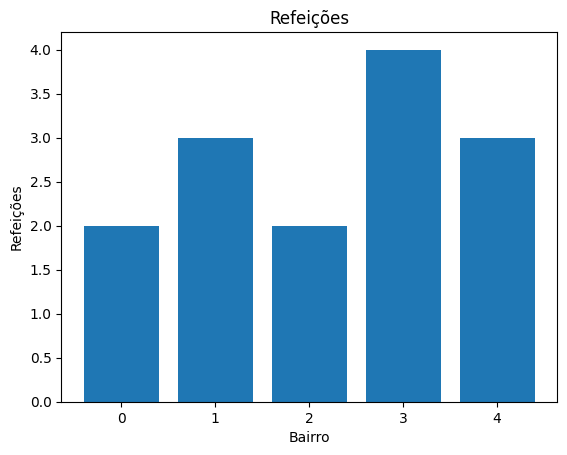

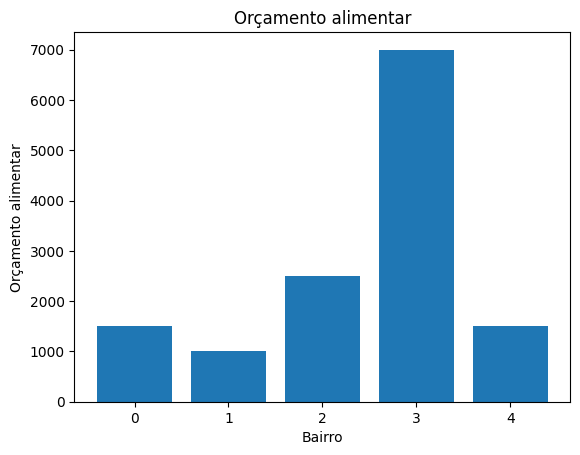

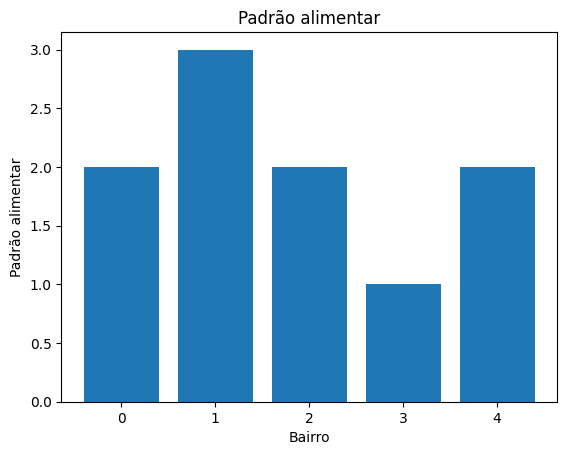

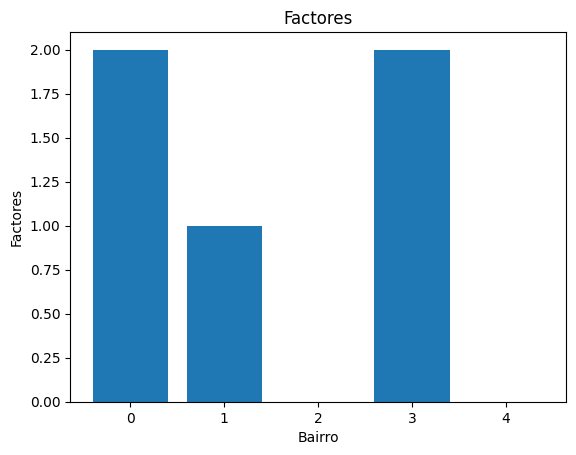

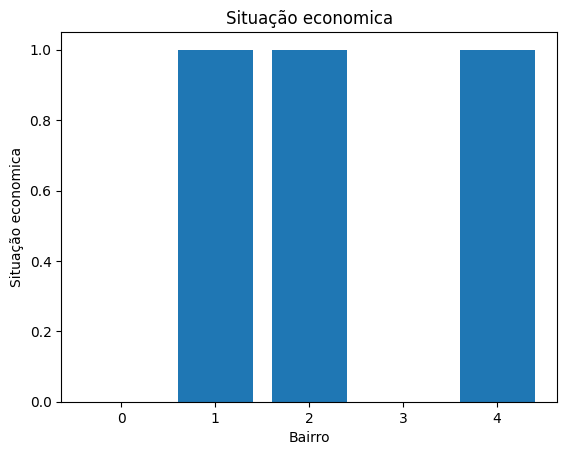

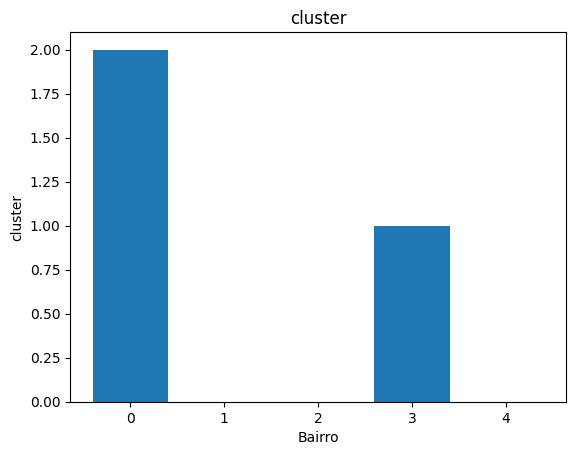

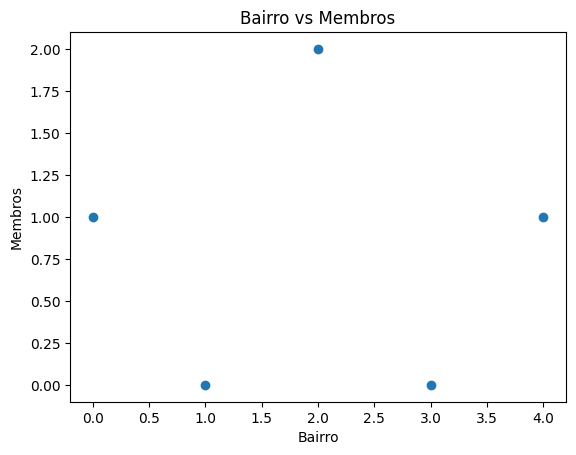

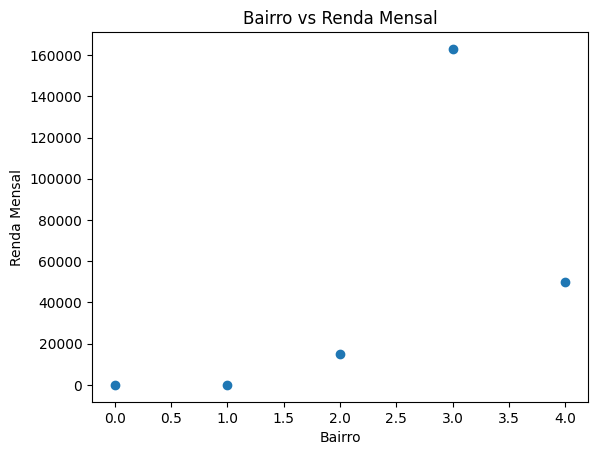

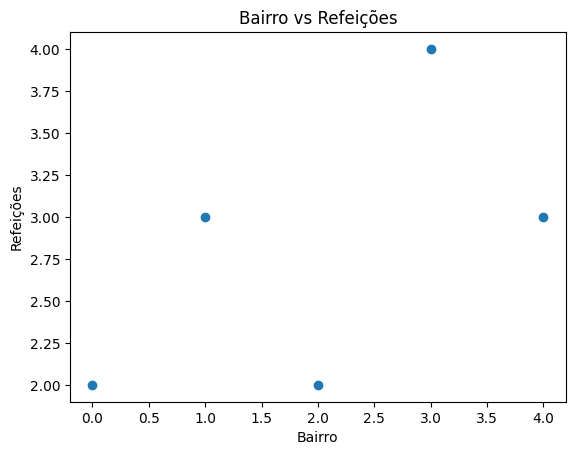

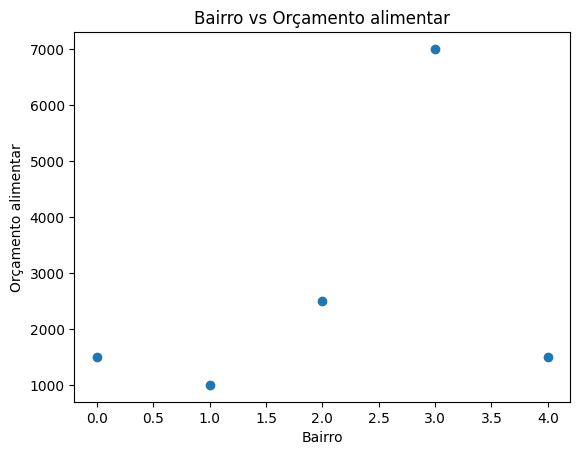

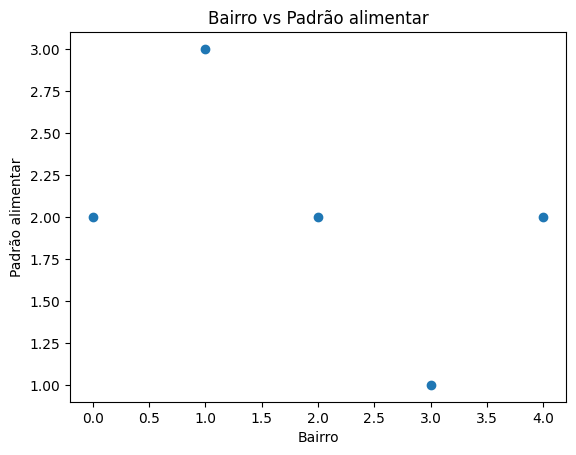

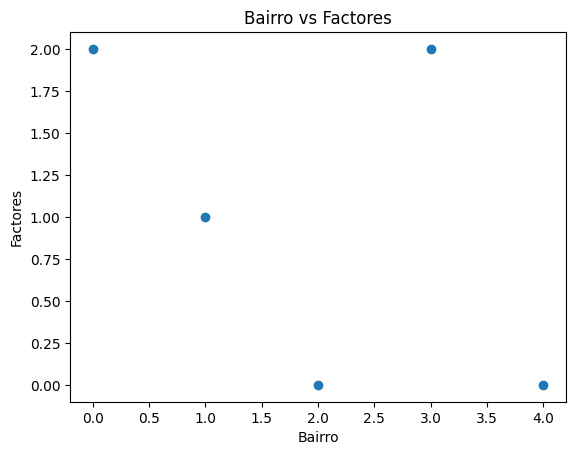

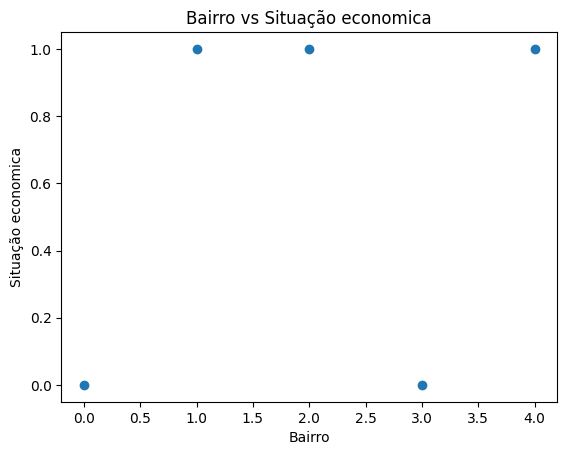

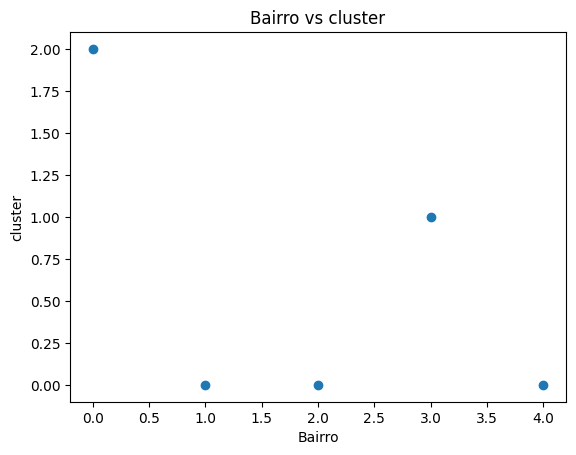

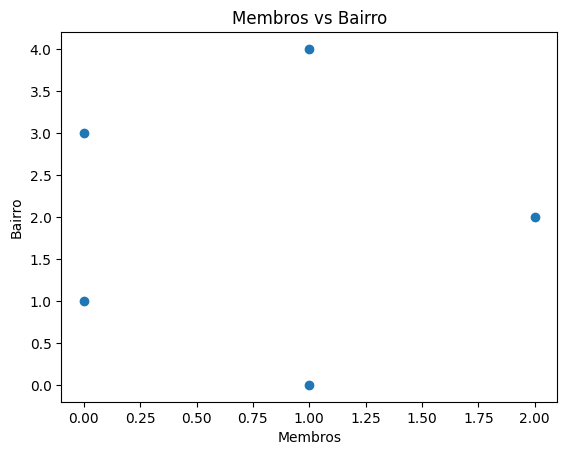

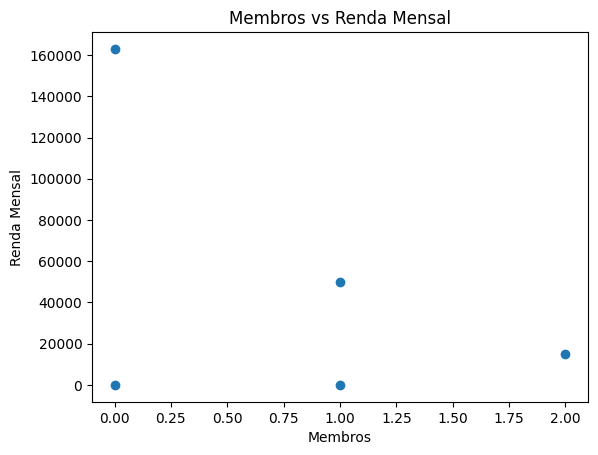

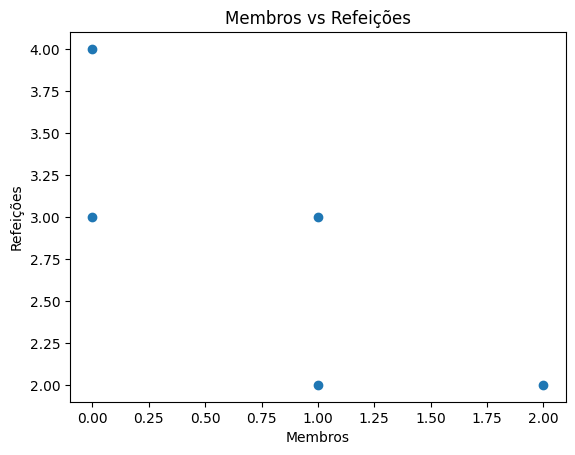

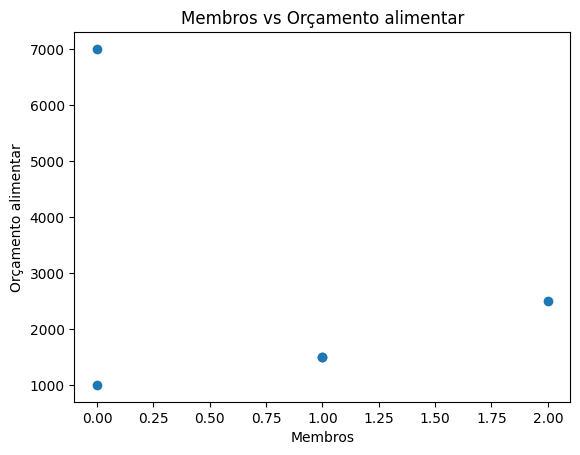

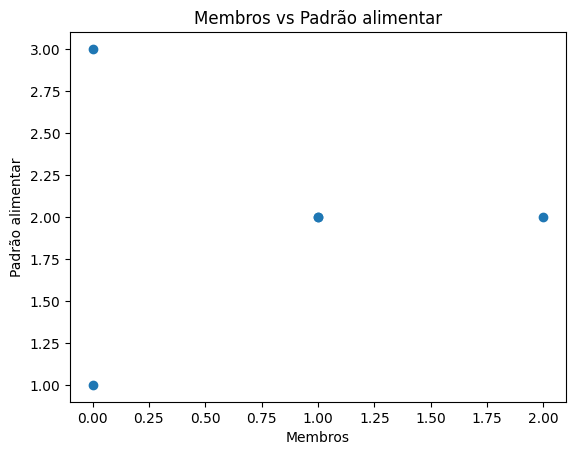

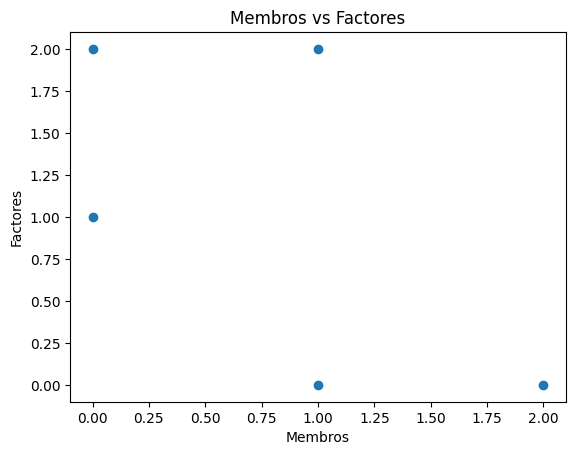

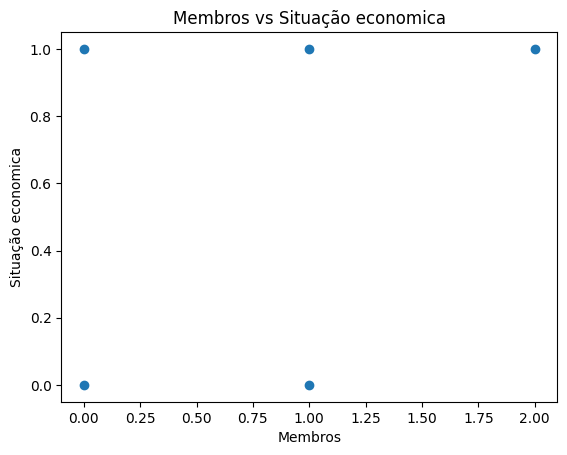

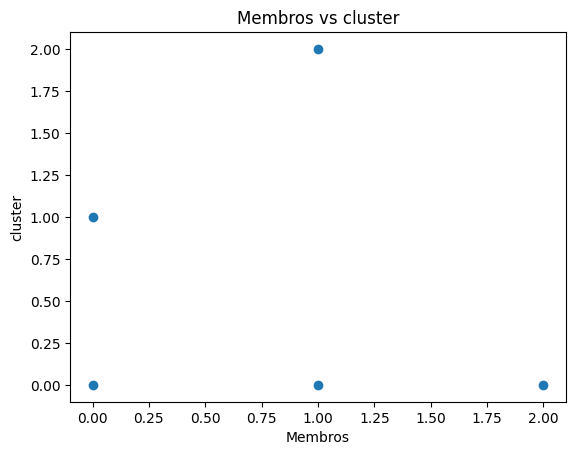

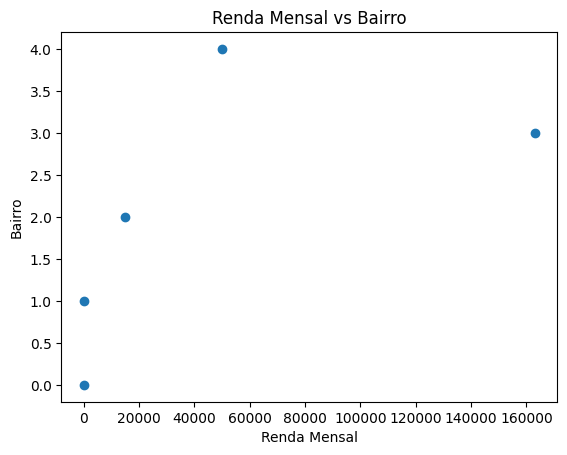

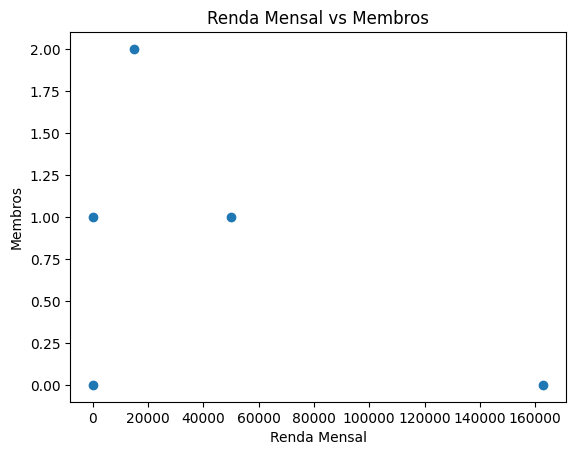

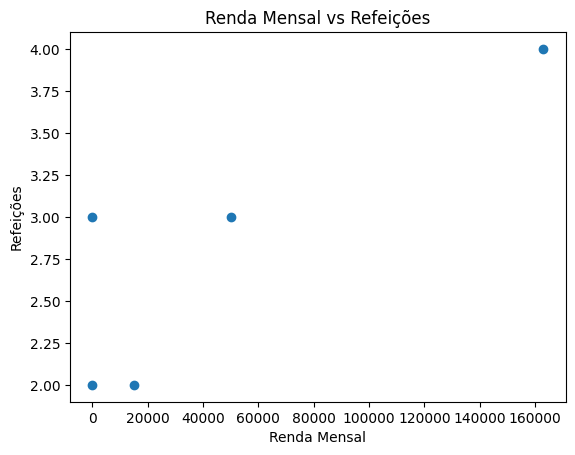

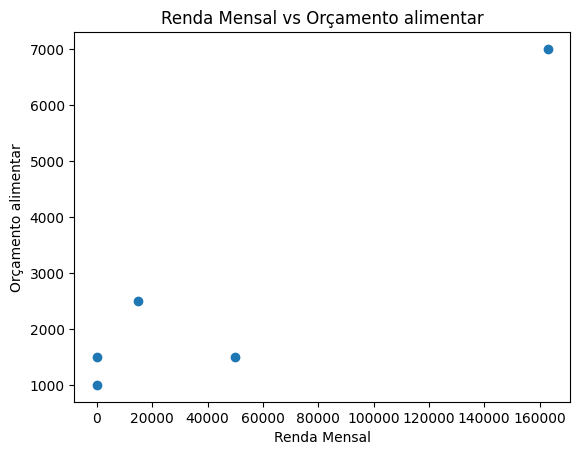

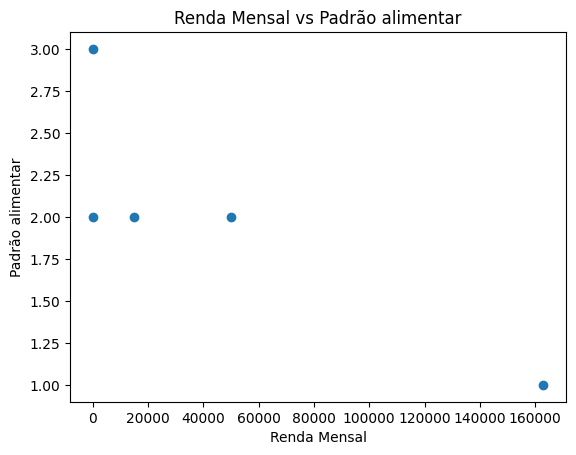

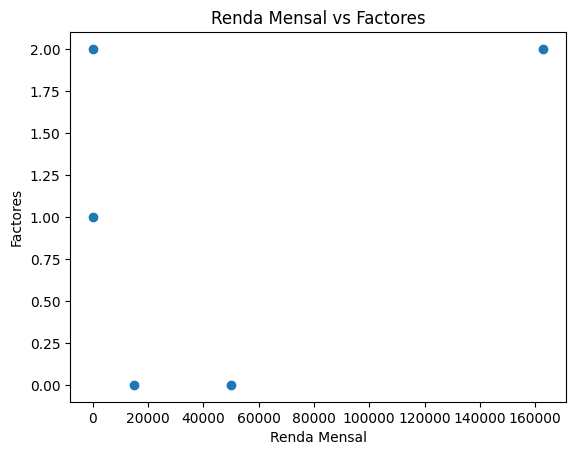

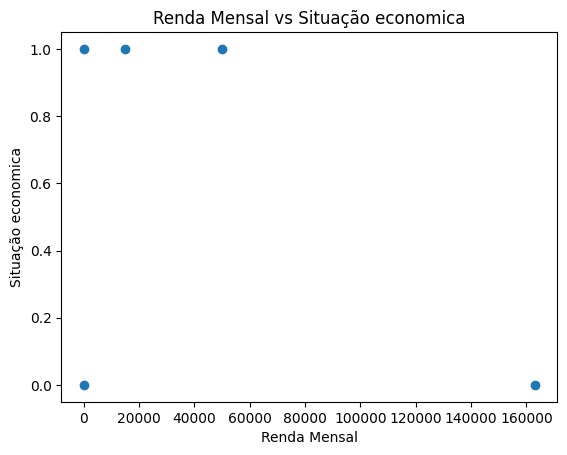

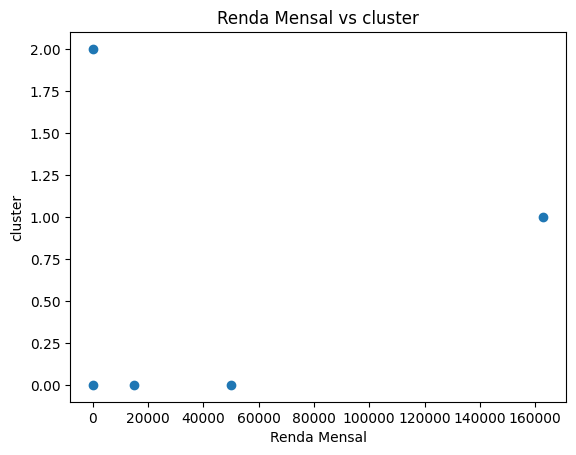

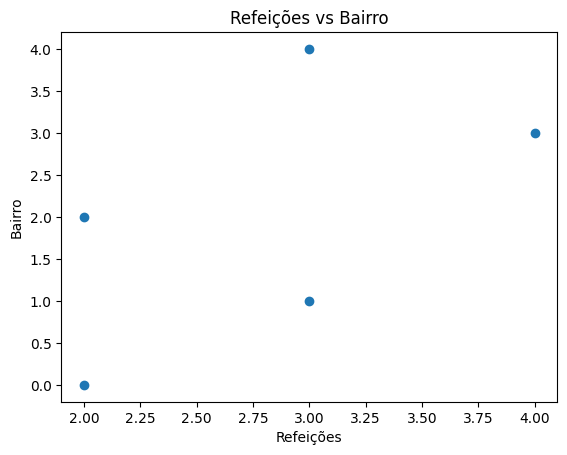

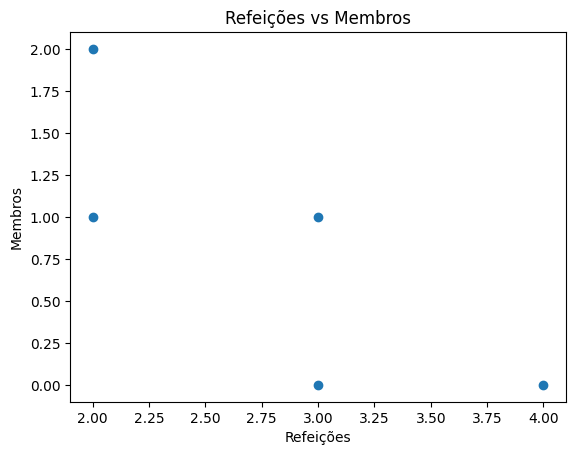

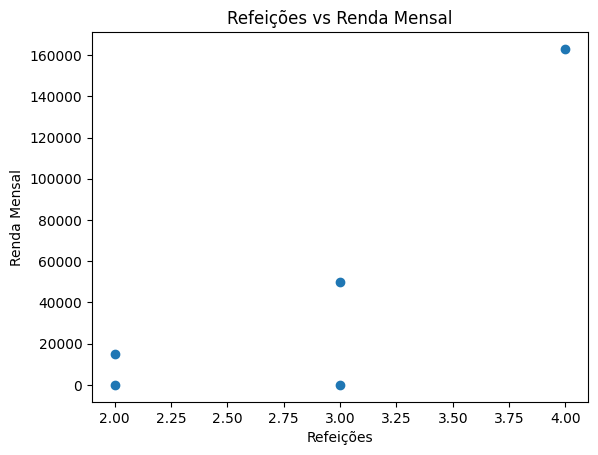

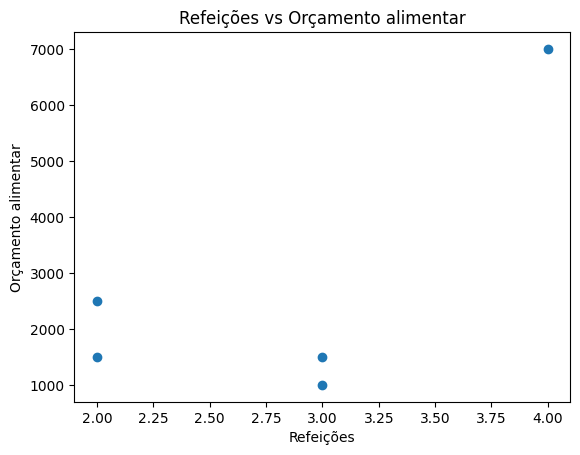

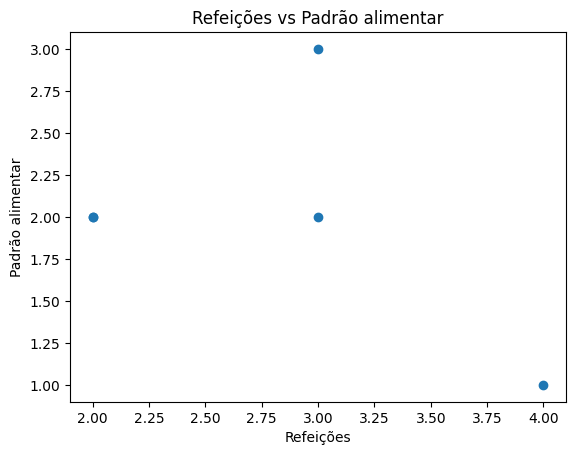

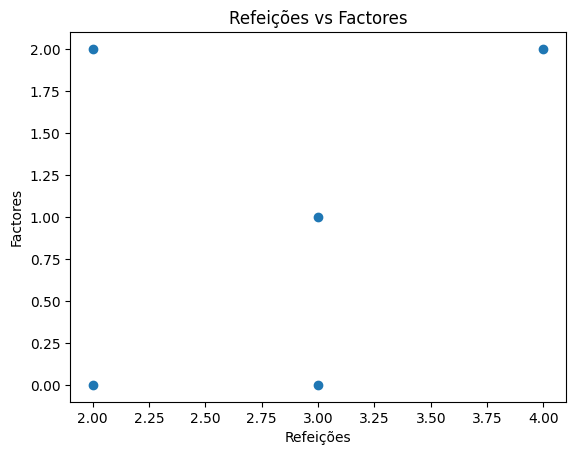

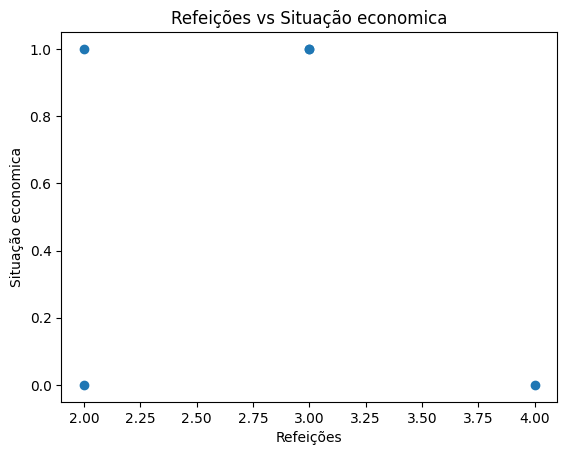

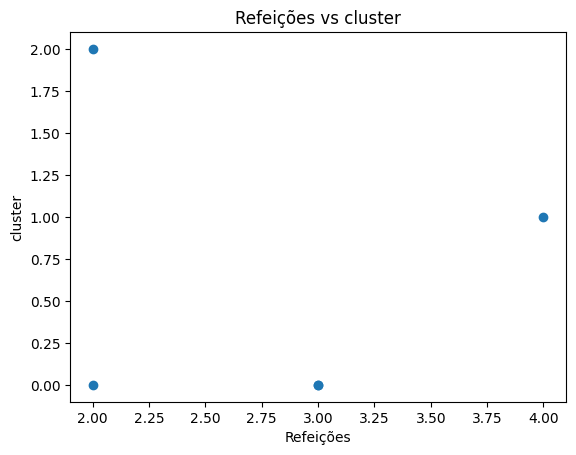

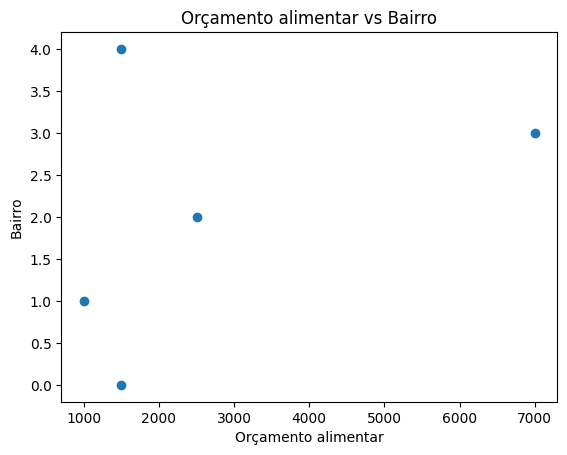

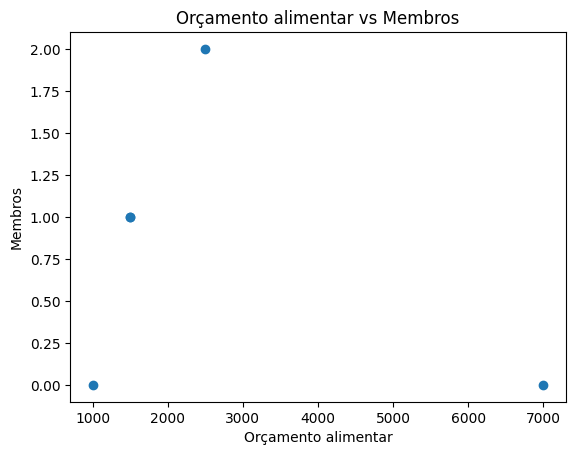

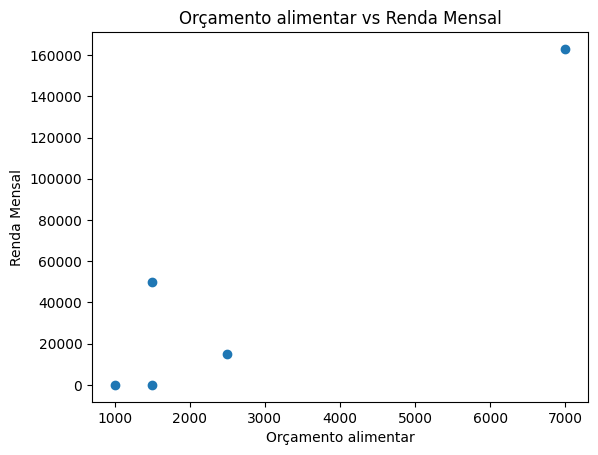

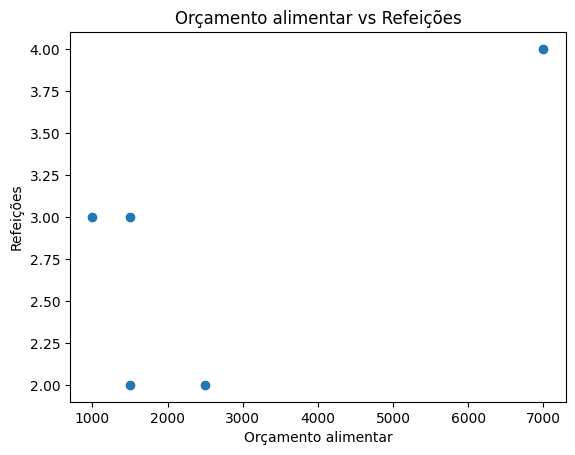

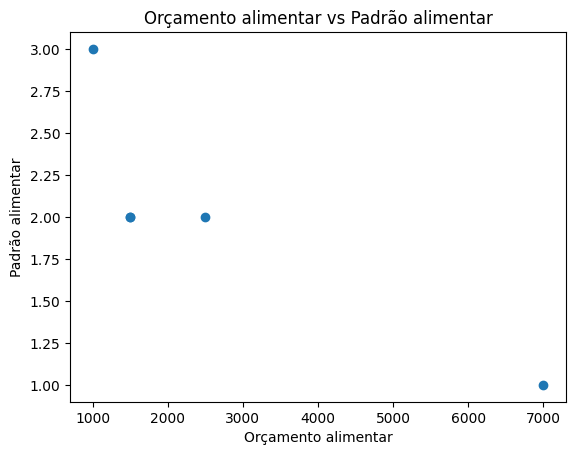

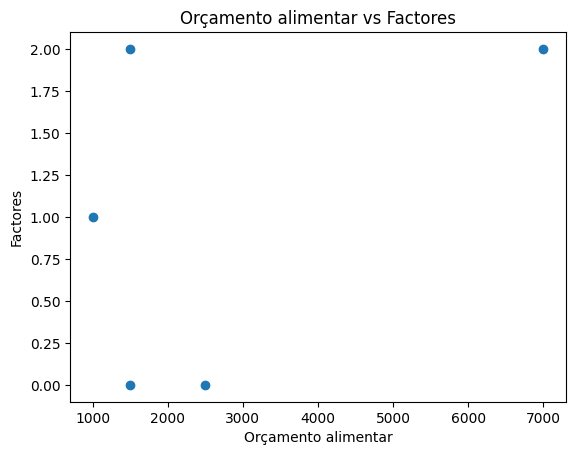

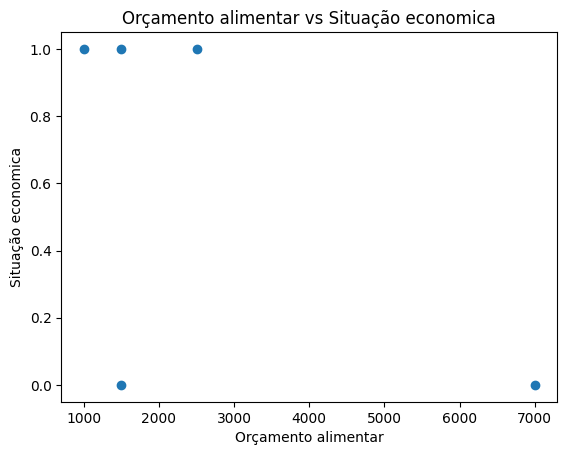

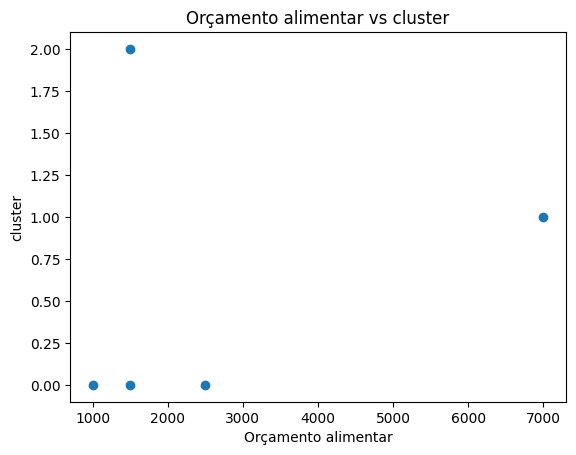

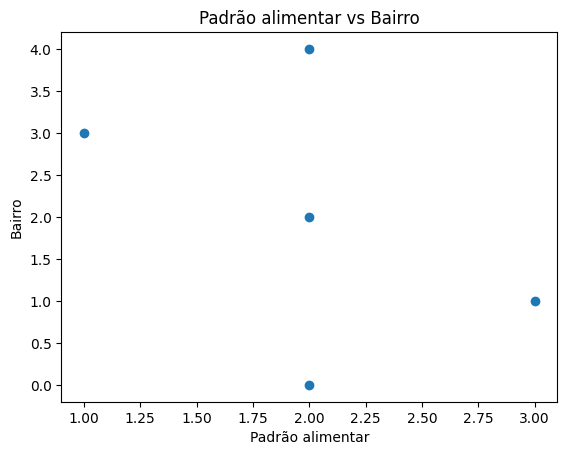

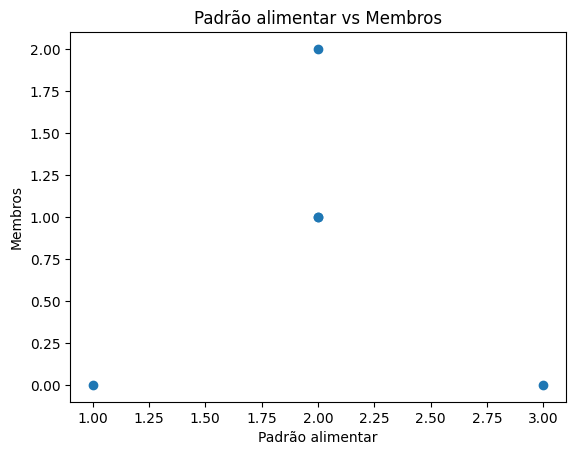

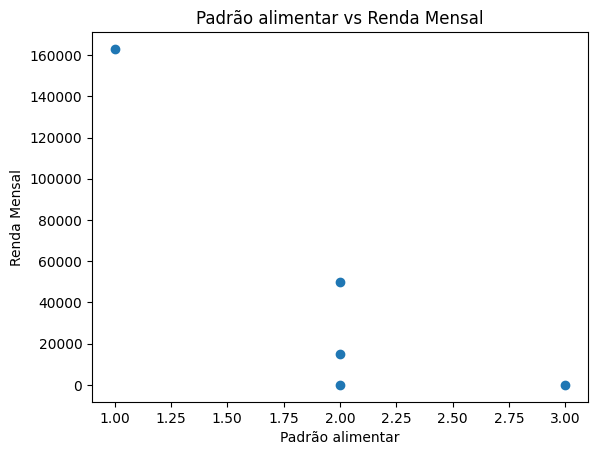

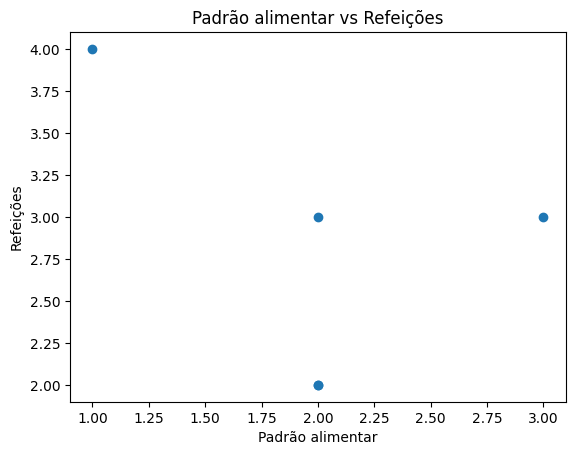

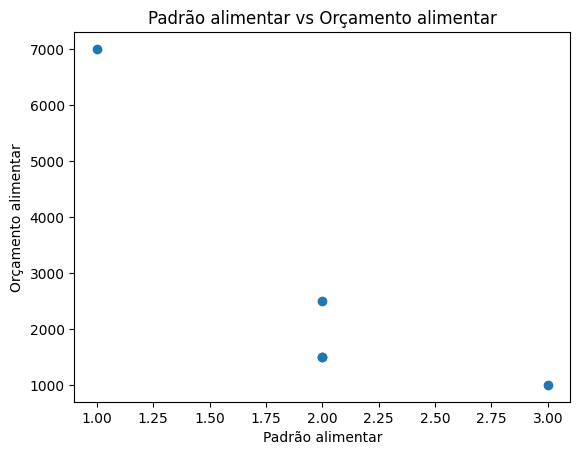

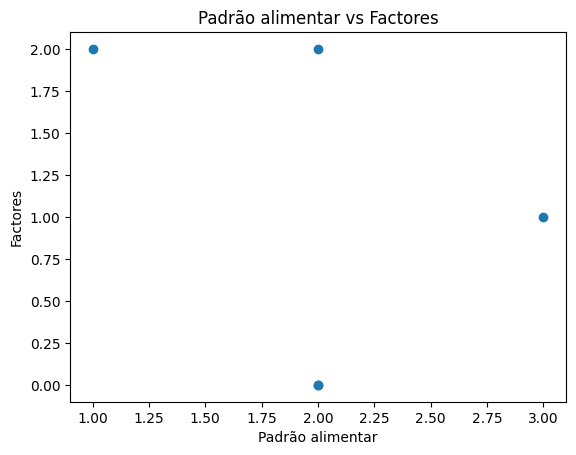

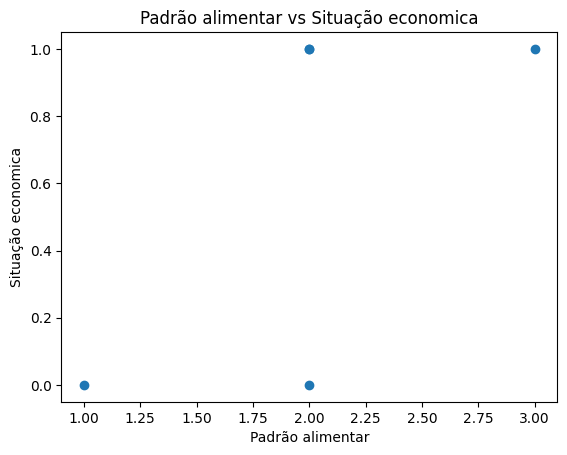

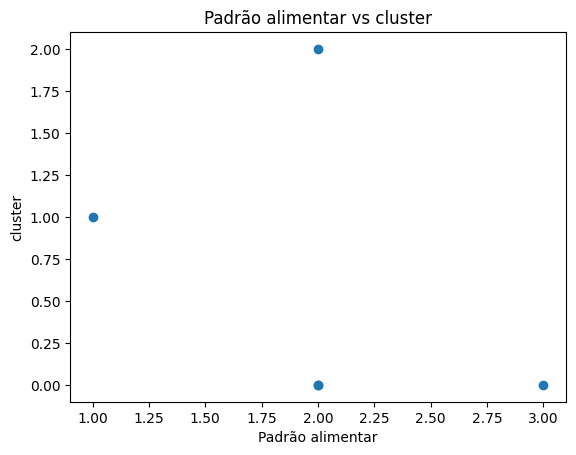

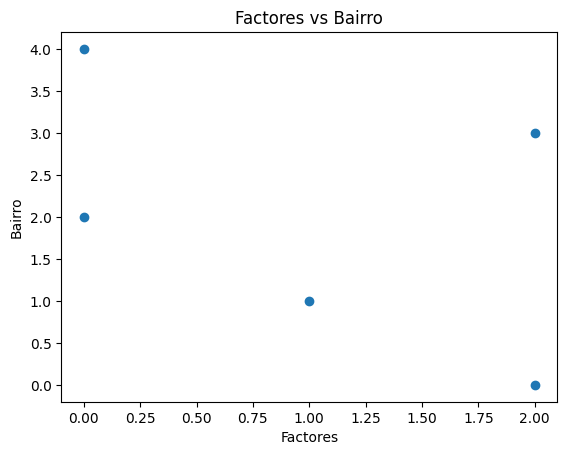

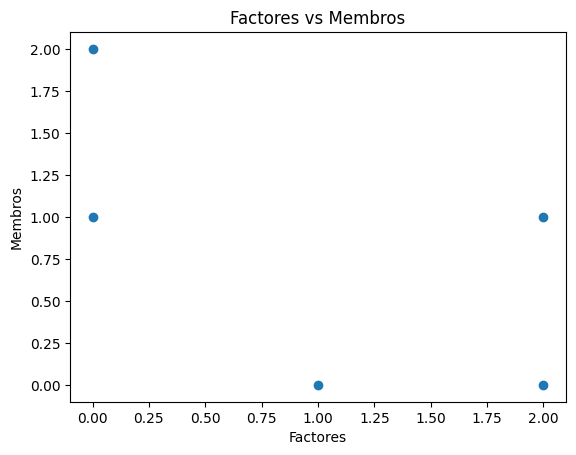

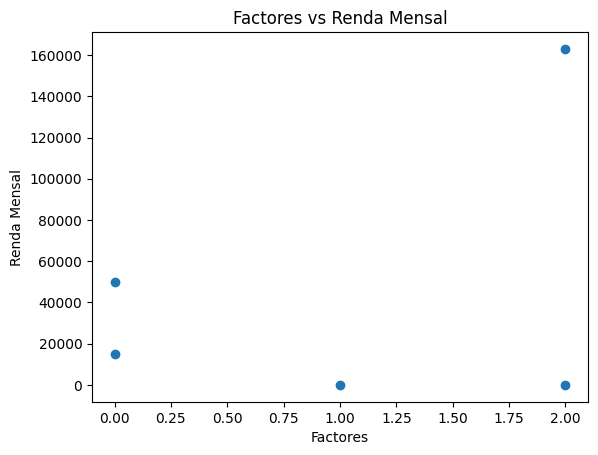

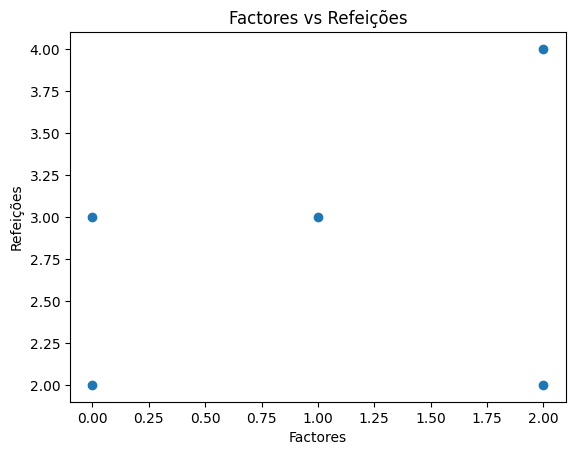

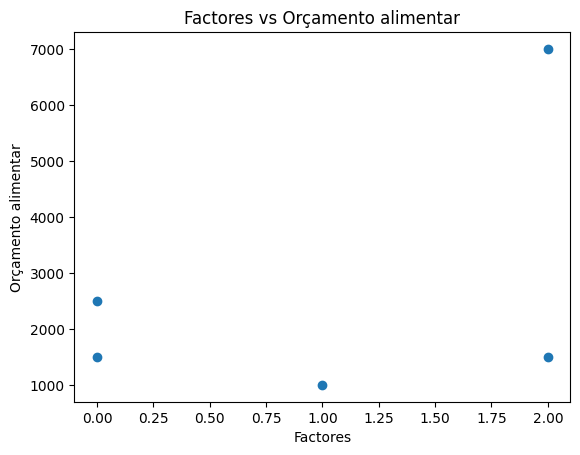

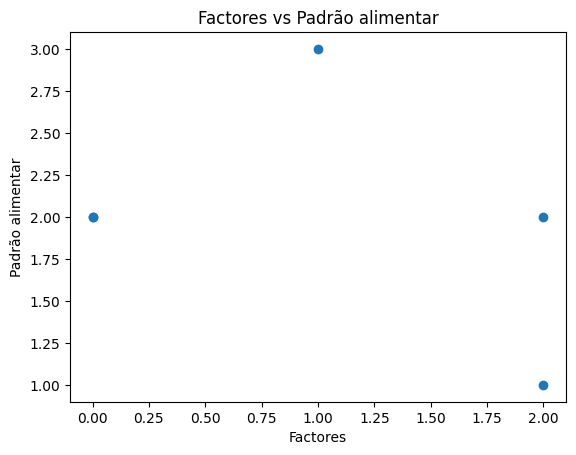

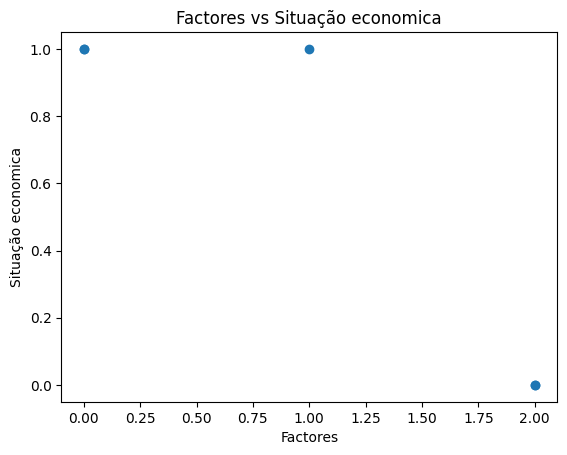

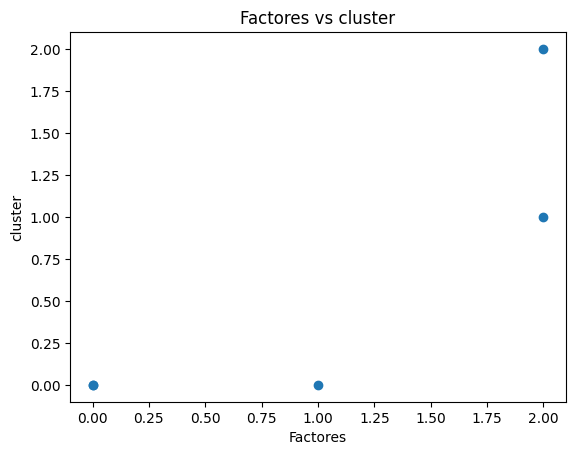

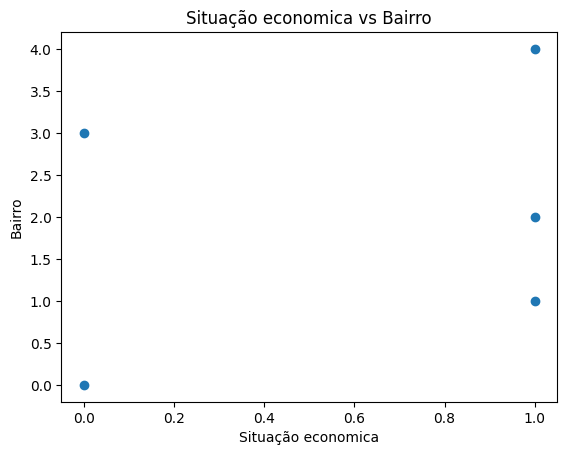

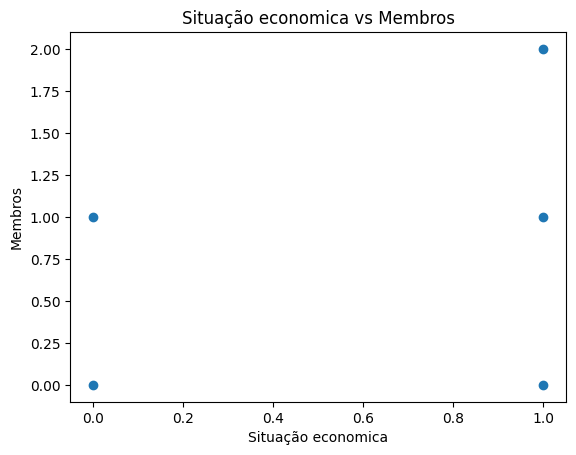

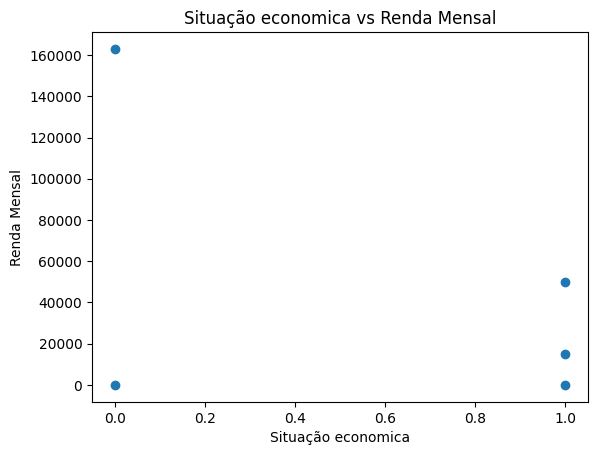

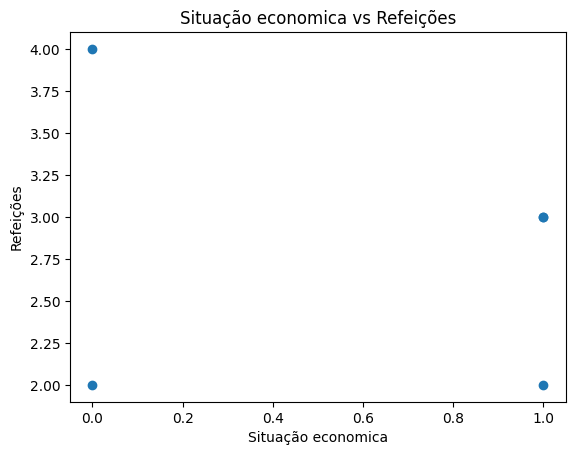

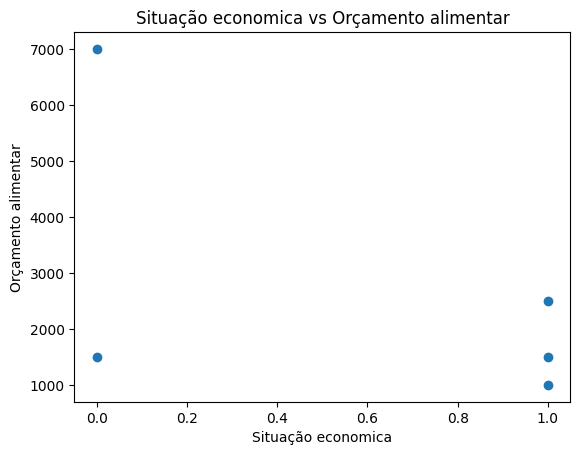

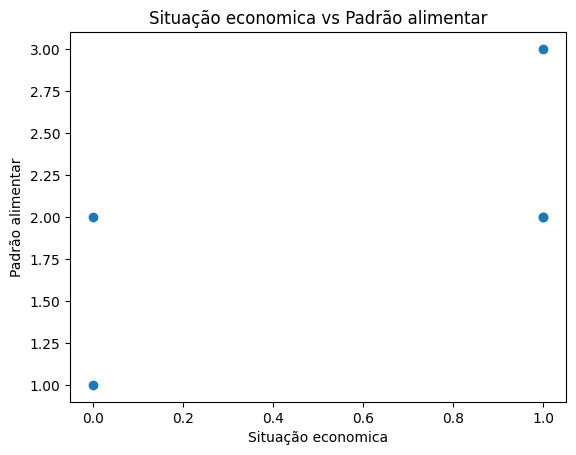

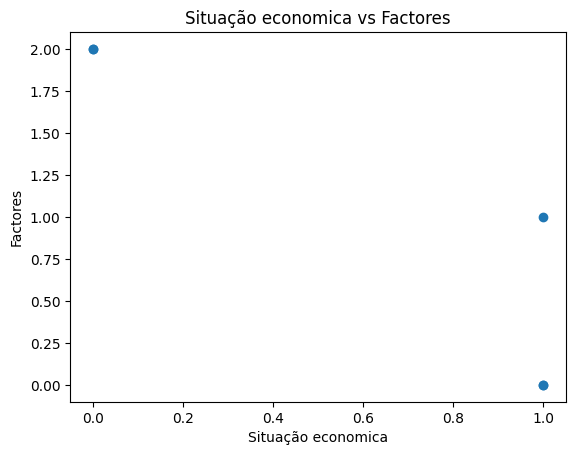

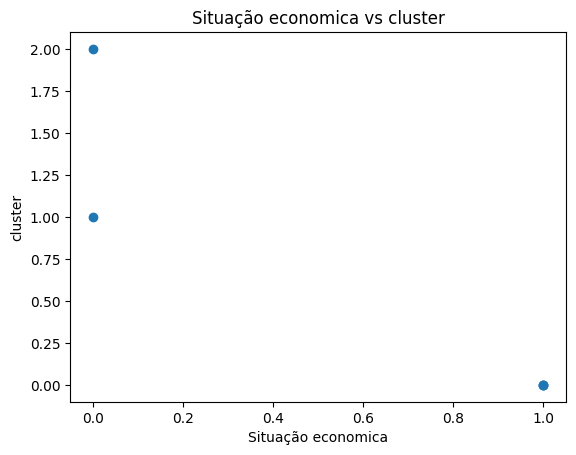

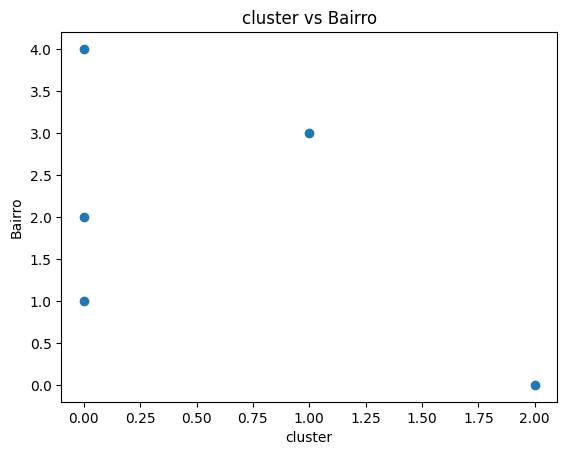

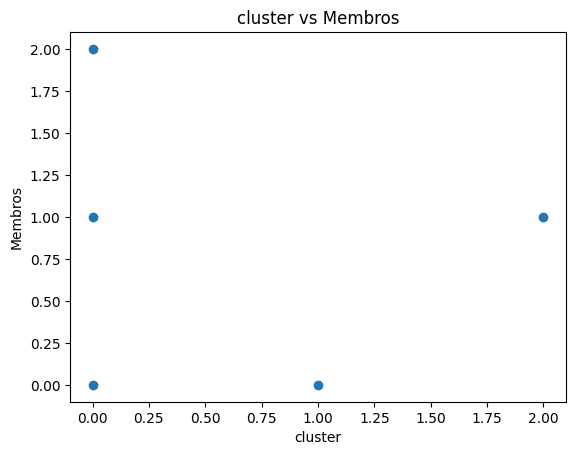

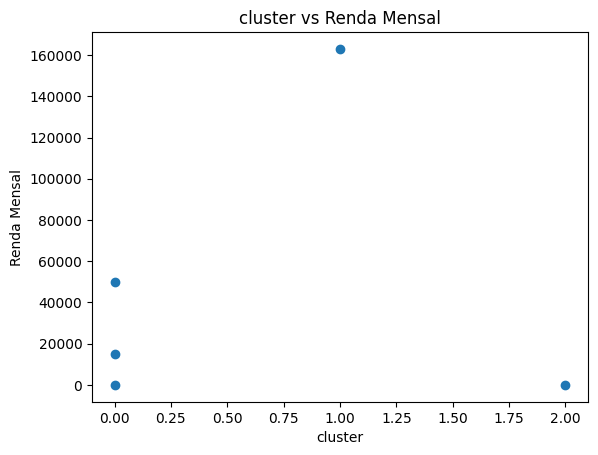

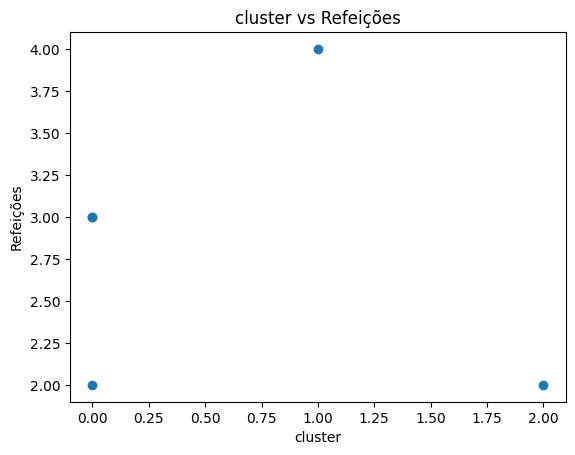

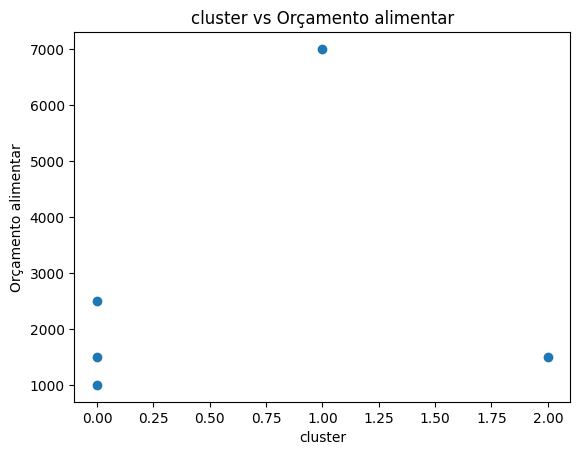

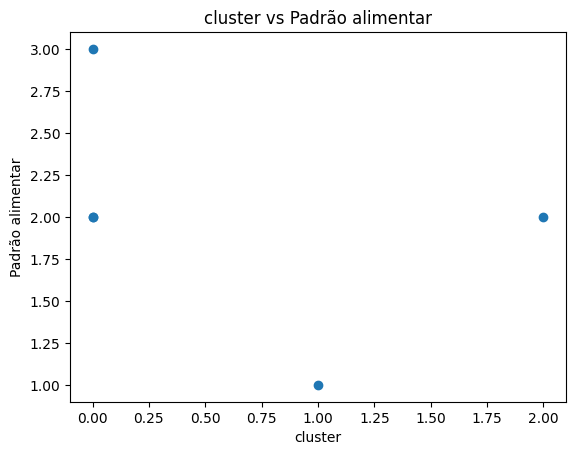

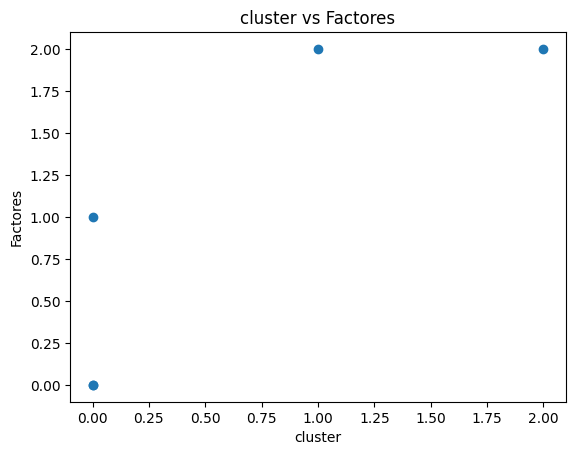

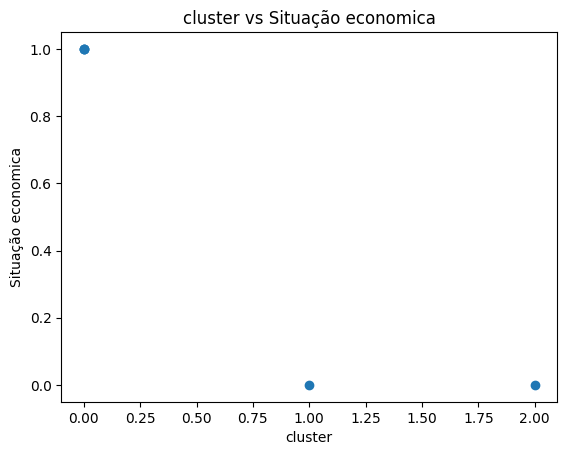

In [25]:

# Crie um DataFrame a partir dos dados
data = {
    'Bairro': [0, 1, 2, 3, 4],
    'Membros': [1, 0, 2, 0, 1],
    'Renda Mensal': [0, 0, 15000, 163000, 50000],
    'Refeições': [2, 3, 2, 4, 3],
    'Orçamento alimentar': [1500, 1000, 2500, 7000, 1500],
    'Padrão alimentar': [2, 3, 2, 1, 2],
    'Factores': [2, 1, 0, 2, 0],
    'Situação economica': [0, 1, 1, 0, 1],
    'cluster': [2, 0, 0, 1, 0]
}
df = pd.DataFrame(data)

# Crie um gráfico de barras para cada variável
for col in df.columns:
    plt.figure()
    plt.bar(df['Bairro'], df[col])
    plt.title(col)
    plt.xlabel('Bairro')
    plt.ylabel(col)
    plt.show()

# Crie um gráfico de dispersão para cada par de variáveis
for col1 in df.columns:
    for col2 in df.columns:
        if col1 != col2:
            plt.figure()
            plt.scatter(df[col1], df[col2])
            plt.title(f'{col1} vs {col2}')
            plt.xlabel(col1)
            plt.ylabel(col2)
            plt.show()